In [32]:
# manipulating and reading data using pandas
# visualizing data using seaborn

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [35]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [36]:
df.shape

(200, 4)

In [37]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

**Features**
- TV
- radio
- newspaper

**Response**
- sales

**There are 200 observations**
- each observation represents a single market

In [38]:
# response is continuous, it's a regression problem
# 200 observations - each one a single market

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


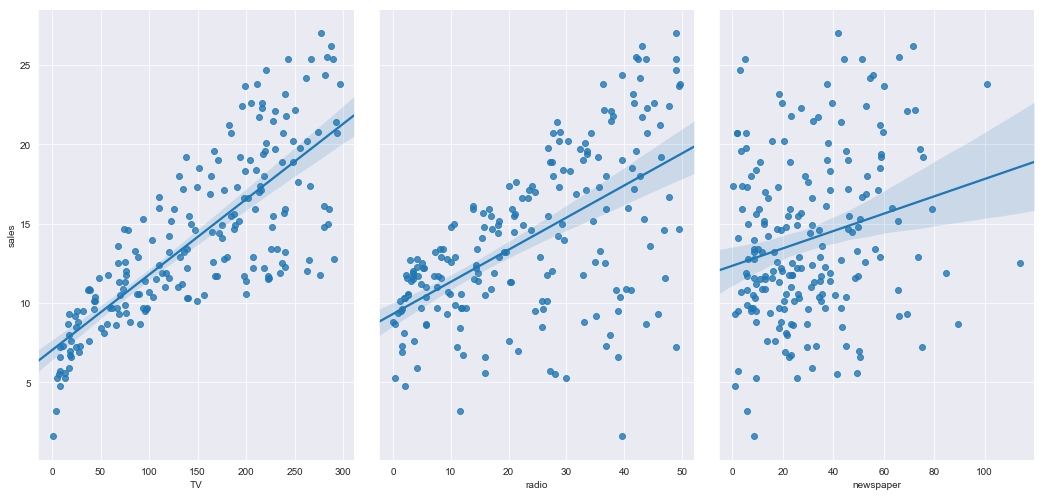

In [39]:
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7,kind='reg')

**Linear Regression**
- Pros: fast, no tuning, highly interpretable, easily understood
- Cons: doesn't produce best accuracy (presumes linear relationship b/w features and response)

**functional form:**
- y(response) = b0(intercept) + b1 * feature1 + b2 * feature2 + -------- + bn * featureN

**(bn - model coefficients)**

**(intercept -- value of y when all x values are 0.)**

In [40]:
X = df[['TV','radio','newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [41]:
print(X.shape)
print(type(X))

(200, 3)
<class 'pandas.core.frame.DataFrame'>


In [42]:
y = df['sales']
print(type(y))

<class 'pandas.core.series.Series'>


In [43]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

**Split X and y into training and testing sets**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [45]:
# default 75% training and 25% testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [46]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_) ## Attributes estimated from data

2.8769666223179353
[0.04656457 0.17915812 0.00345046]


In [48]:
zip(['TV','radio','newspaper'],linreg.coef_)

In [49]:
for i in zip(['TV','radio','newspaper'],linreg.coef_):
    print(i)

('TV', 0.04656456787415026)
('radio', 0.1791581224508884)
('newspaper', 0.0034504647111804065)


In [50]:
# focus is on association, not on causation (not considering other factors affecting sales)

In [51]:
y_pred = linreg.predict(X_test)

In [52]:
# accuracy not useful for linear regression
# evaluation metric is used/

In [53]:
#1 Mean Absolute error -- average error
true = [100,50,30,20]
pred = [90,50,50,30]
print((10+0+20+10)/4)
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


In [54]:
#2 Mean Squared Error -- punishes larger errors
print((10**2 + 0**2 + 20**2 + 10**2)/4)
print(metrics.mean_squared_error(true,pred))

150.0
150.0


In [55]:
#3 Root Mean Squared Error -- interpretable in 'y' units
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


In [56]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) ## RMSE for sales predictions

1.4046514230328948


**Feature selection using train/test split**

In [57]:
## excluding newspaper feature, the model performs slightly better
X = df[['TV','radio']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) ## error decreased

1.3879034699382882


In [58]:
X = df[['TV','newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.352056334433862


In [59]:
X = df[['newspaper','radio']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.7486974974677265


In [60]:
X = df[['TV']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542


In [61]:
## try different combination of features and select the one with lowest RMES value

In [62]:
## Resources:
## Also look at the longer notebook on Linear Regression